<a href="https://colab.research.google.com/github/raul-miranda/DS-201-Project-1/blob/main/Project_1_part_1_loading_and_wrangling_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np


In [3]:
from google.colab import files
target = files.upload()

Saving aug_test.csv to aug_test.csv
Saving aug_train.csv to aug_train.csv
Saving jobchange_test_target_values.npy to jobchange_test_target_values.npy


In [21]:
# list files in google colab current directory
import os
from os import listdir

for f in os.listdir('.'):
  if os.path.isfile(f):
    print(f)

aug_train.csv
jobchange_test_target_values.npy
aug_test1.csv
aug_test.csv


In [5]:
# load the target data for the test set, provided as a numpy array

target =  np.load('jobchange_test_target_values.npy')

In [6]:
len(target)

2129

In [15]:
# load the test set, provided as a CSV file

testdata = pd.read_csv('aug_test.csv',sep=',')

In [16]:
len(testdata)


2129

In [17]:
testdata[0:5]  # test data without the target column


,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,32403,city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,<10,NaN,1,21
1,9858,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,NaN,Pvt Ltd,1,98
2,31806,city_21,0.624,Male,No relevent experience,no_enrollment,High School,NaN,<1,NaN,Pvt Ltd,never,15
3,27385,city_13,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11,10/49,Pvt Ltd,1,39
4,27724,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4,72


In [9]:
target[:5]   #   target array

array([1., 0., 1., 0., 1.])

In [18]:
testdata['target'] = target    #   add the column with targets to testdata 

In [11]:
testdata[:5]  #  test data with the target column

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,32403,city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,<10,NaN,1,21,1.0
1,9858,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,NaN,Pvt Ltd,1,98,0.0
2,31806,city_21,0.624,Male,No relevent experience,no_enrollment,High School,NaN,<1,NaN,Pvt Ltd,never,15,1.0
3,27385,city_13,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11,10/49,Pvt Ltd,1,39,0.0
4,27724,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4,72,1.0


In [19]:
# correct typo in 'relevent'
testdata['relevent_experience'] = testdata['relevent_experience'].str.replace('relevent', 'relevant')
testdata.rename (inplace=True, columns={'relevent_experience':'relevant_experience'})
testdata.head()

,enrollee_id,city,city_development_index,gender,relevant_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,32403,city_41,0.827,Male,Has relevant experience,Full time course,Graduate,STEM,9,<10,NaN,1,21,1.0
1,9858,city_103,0.920,Female,Has relevant experience,no_enrollment,Graduate,STEM,5,NaN,Pvt Ltd,1,98,0.0
2,31806,city_21,0.624,Male,No relevant experience,no_enrollment,High School,NaN,<1,NaN,Pvt Ltd,never,15,1.0
3,27385,city_13,0.827,Male,Has relevant experience,no_enrollment,Masters,STEM,11,10/49,Pvt Ltd,1,39,0.0
4,27724,city_103,0.920,Male,Has relevant experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4,72,1.0


In [20]:
# save the test set with target column included, as: aug_test1.csv

testdata.to_csv ('aug_test1.csv', sep = ',')

In [22]:
# load the training set, provided as a CSV file

training = pd.read_csv('aug_train.csv',sep=',')

In [23]:
len(training)

19158

In [24]:
training[:5]

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [25]:
# correct typo in 'relevent'
training['relevent_experience'] = training['relevent_experience'].str.replace('relevent', 'relevant')
training.rename (inplace=True, columns={'relevent_experience':'relevant_experience'})
training.head()

,enrollee_id,city,city_development_index,gender,relevant_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevant experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevant experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevant experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevant experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevant experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [26]:
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevant_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [27]:
training.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevant_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [28]:
training_wo_nullgender = training.gender.dropna()

In [29]:
training_wo_nullgender.isnull().sum()


0

47.0
47.0
[44. 50.]


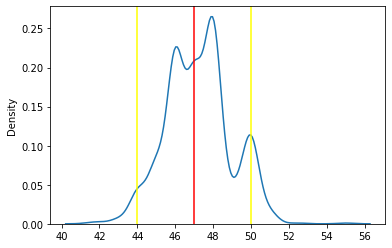

In [81]:
##  bootstrapping inference of median of 'training_hours' array

print (training['training_hours'].median())   #  original sample median

median_boot_samples = []
for i in range (1000):
  boot_sample = np.random.choice(training['training_hours'], 1000)
  median_boot_samples.append(np.median(boot_sample))

bootstrap_median = np.median(median_boot_samples)
print (bootstrap_median)        # compare bootstrap median with original

conf_int = np.percentile(median_boot_samples, [2.5, 97.5])     #confidence interval central 95%
print (conf_int)

import seaborn as sns
import matplotlib.pyplot as plt

sns.kdeplot (median_boot_samples)
plt.axvline (bootstrap_median, color = 'red')
for ends in conf_int:
  plt.axvline (ends, color = 'yellow')


In [82]:
## implement bootstrapping to infer the median of 'training_hours', using sklearn resample
from sklearn.utils import resample

print (training['training_hours'].median())    # median of original sample

median_boot_samples = []

for i in range (100):
  boot_sample = resample(training['training_hours'], replace=True, random_state=1)
  median_boot_samples.append (np.median(boot_sample))

bootstrap_median = np.median(median_boot_samples)
print(bootstrap_median)    # compare bootstrap median with with median of original sample


47.0
47.0
